<a href="https://colab.research.google.com/github/rodrigomariamorgao/portfolio_data_science/blob/master/Analisando_os_Dados_do_Airbnb_Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="BannerDataScience" width="100%" src="https://raw.githubusercontent.com/rodrigomariamorgao/portfolio_data_science/master/banner.png">

---

# Análise dos Dados do Airbnb - *Tokyo, Japão*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo (Japão), e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados nesta análise foram obtidos a partir do site independente [Inside Airbnb](http://insideairbnb.com/index.html).

Para esta análise exploratória, foi baixado apenas o arquivo *`listings.csv` [Summary information and metrics for listings in Tokyo (good for visualisations)]*, atualizado em 28 de dezembro de 2021.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo demostrar a situação inicial dos dados e permitir um entendimento de como os mesmos estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome do imóvel anunciado
* `host_id` - número de id do proprietário do imóvel
* `host_name` - nome do proprietário
* `neighbourhood_group` - zona do bairro
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que o imóvel possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,165,2020-03-04,1.32,1,363,0,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,8027,3,228,2020-01-18,2.06,1,257,0,M130000243
2,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,40000,2,95,2020-03-17,0.93,1,88,0,M130007760
3,1249571,Unique stay! New&1min to the subway,6809418,Yume,NaN,Shibuya Ku,35.65111,139.72165,Entire home/apt,35000,4,102,2020-12-27,1.01,1,354,0,M130000957
4,1263000,SHIBUYA 7 MINS AMAZING HOST（for woman only）,6876728,Haruko,NaN,Setagaya Ku,35.60742,139.67616,Private room,8286,3,185,2019-12-31,1.79,1,361,0,M130000057


Notamos que o campo `neighbourhood_group` apresenta somente valores nulos nas primeiras 5 entradas. Iremos avaliar todos as entradas desse campo na **Q2**.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` existe uma versão mais completa [`listings.csv.gz`](http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/data/listings.csv.gz).

In [5]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

# verificar os tipos de entradas do dataset
display(df.dtypes)

Variáveis:	 18

Entradas:	 10314


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está relacionado diretamente à quantidade de dados faltantes. É importante compreender logo no início da análise se esses valores nulos são significativos comparado ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em cerca de 20% das linhas.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.201862
last_review                       0.201862
license                           0.005914
host_name                         0.000970
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

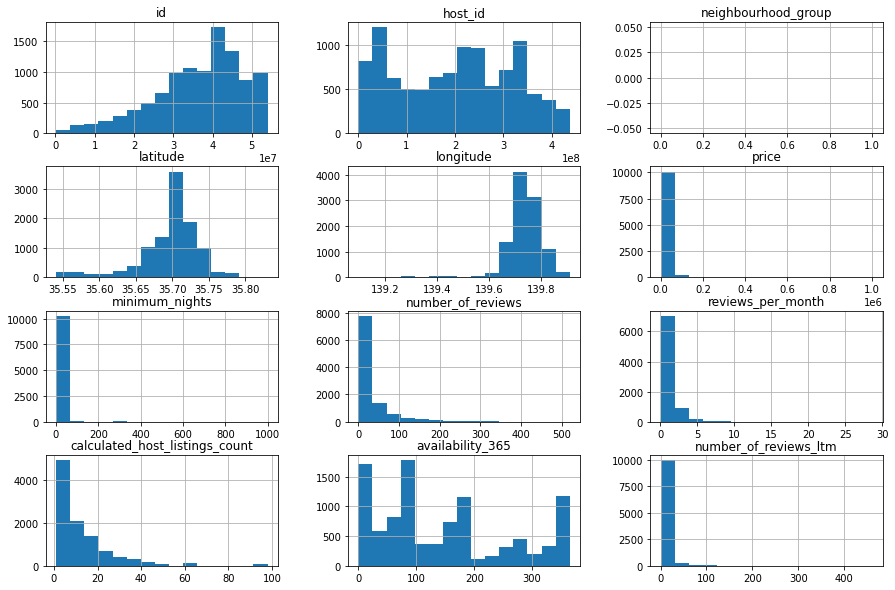

In [7]:
# plotar histogramas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [9]:
# calcular a média da coluna `price`
df.price.mean()

17219.698952879582

### **Q5. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn


In [10]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.157614,0.005582,0.035836,-0.048487,0.005577
minimum_nights,0.157614,1.000000,-0.035775,-0.036772,0.043766,0.066746
number_of_reviews,0.005582,-0.035775,1.000000,0.669274,-0.161509,0.015190
reviews_per_month,0.035836,-0.036772,0.669274,1.000000,-0.124667,-0.001068
calculated_host_listings_count,-0.048487,0.043766,-0.161509,-0.124667,1.000000,0.066509
availability_365,0.005577,0.066746,0.015190,-0.001068,0.066509,1.000000


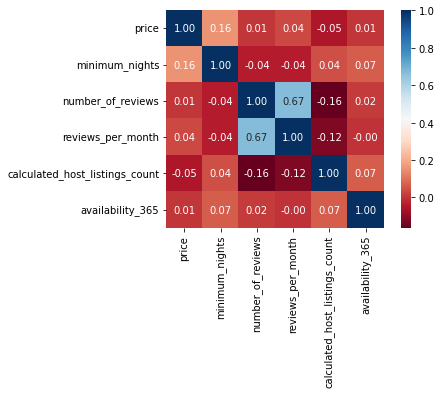

In [11]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Nesse *heatmap* podemos verificar que as colunas *number_of_reviews* e *reviews_per_month* possuem o coeficiente de correlação de 67%.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    6922
Private room       2619
Hotel room          397
Shared room         376
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.671127
Private room       0.253927
Hotel room         0.038491
Shared room        0.036455
Name: room_type, dtype: float64

Analisando as porcentagens retornadas, vemos que cerca de 68% dos imóveis disponíves na cidade de Tokyo são do tipo casas inteiras / apartamento.

### **Q7. Qual a localidade mais cara de Tokyo?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [16]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Edogawa Ku       38337.993865
Okutama Machi    32995.800000
Chiyoda Ku       32347.136842
Arakawa Ku       31580.000000
Shinagawa Ku     30264.644970
Chuo Ku          21394.088235
Mitaka Shi       21060.444444
Komae Shi        20564.250000
Minato Ku        20204.278826
Katsushika Ku    19642.035573
Name: price, dtype: float64

(35.4, 35.9)

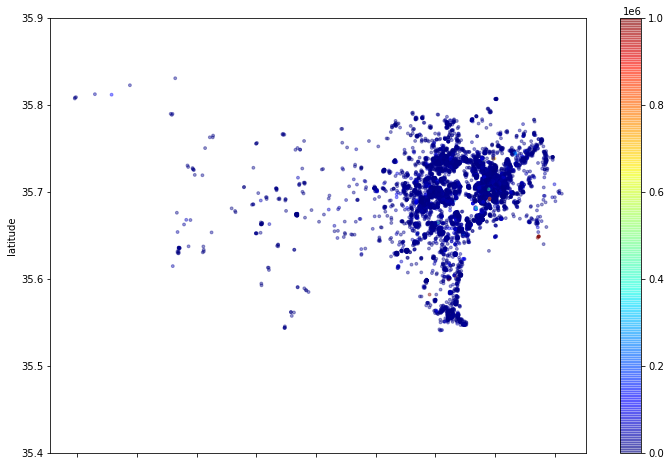

In [17]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));
plt.ylim(35.4,35.9)

De acordo com o grático plotado acima, os imóveis se concentram próximos uns dos outros.

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [18]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.928155904595695

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb para conhecimento das *features* presentes na cidade de Tokyo, no Japão.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.